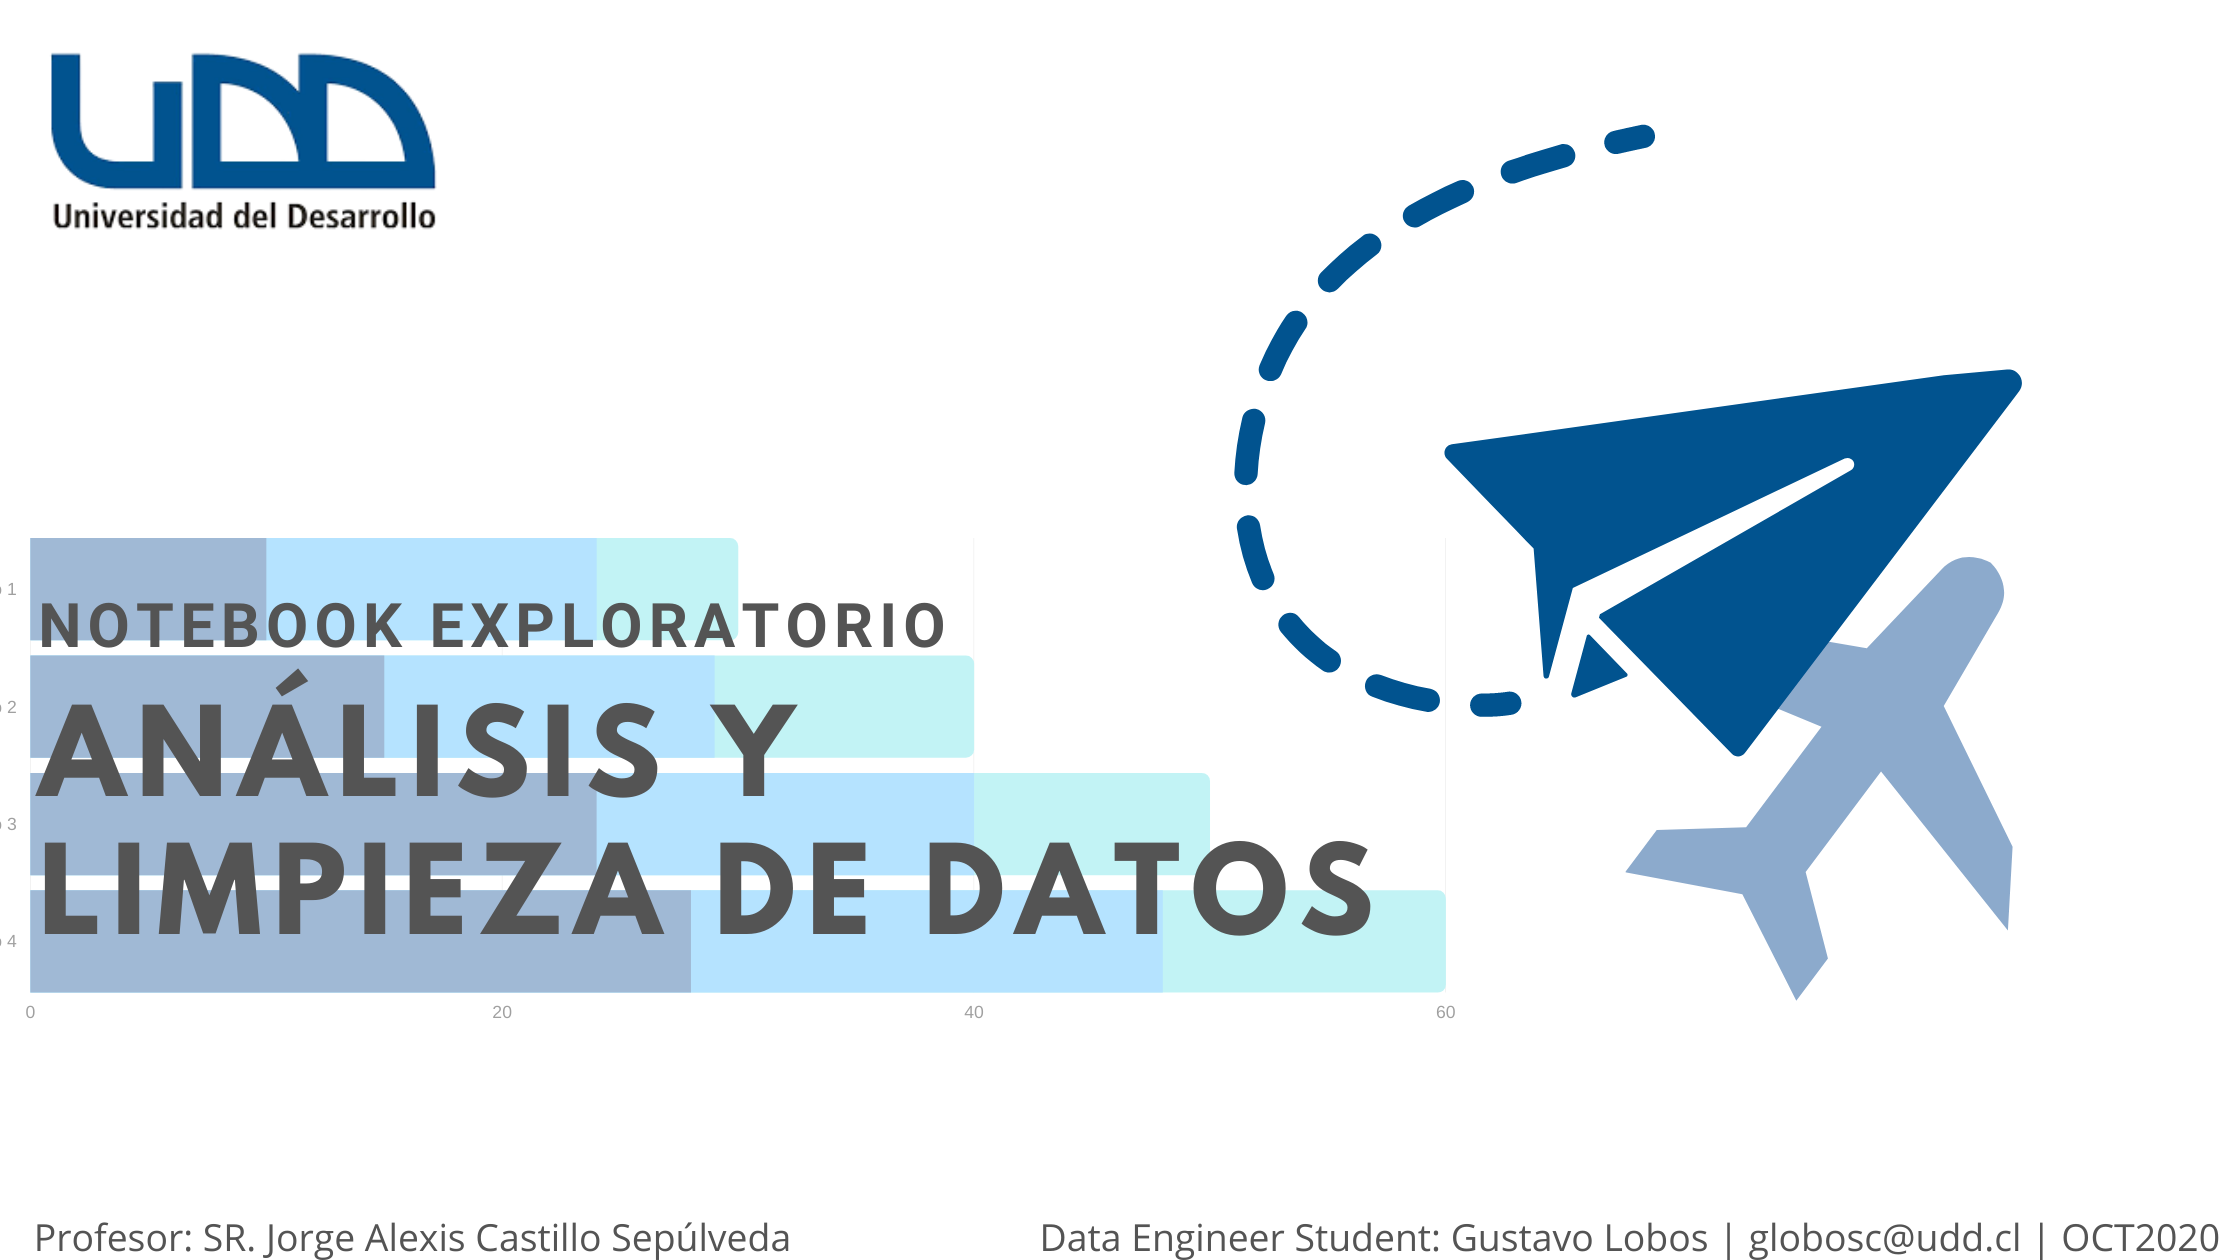



FACULTAD DE INGENIERÍA

TAREA 3

El objetivo de esta tarea es evaluar el conocimiento práctico en lo que respecta a clustering y análisis de componentes principales. Se espera además que los conocimientos sean acumulativos, así que también está considerado evaluar destrezas respecto a la carga, limpieza y análisis descriptivo de datos. También se evaluará el buen uso de markdown para la generación del ipynb, por lo cual se espera que el estudiante presente un trabajo bien redactado y con buena estética ofimática.

****
**Estudiante:** Gustavo Adolfo Lobos Curamil

****

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Desafío Nro. 1**

Usar la librería numpy y el método random.choice para generar una matriz de datos aleatorios de 500 filas y 6 columnas, en donde las entradas sean números enteros tengan como máximo valor 10000. Esto significará que tiene 500 clientes que compran 6 categorías de productos distintos, en donde cada uno compró entre 1 y 10000 unidades en cierto periodo de tiempo.

In [2]:
a = np.arange(10001)
arrayx = np.random.choice(a, (500, 6))
print(arrayx.shape)
arrayx

(500, 6)


array([[3983, 8083, 1695, 8442, 8674, 5741],
       [5869, 4661,  635, 6987, 1877, 4641],
       [3857, 8810,  418, 5915, 3022, 7247],
       ...,
       [1575, 4573, 7721, 4699, 1070, 1346],
       [9450, 5359, 5539, 7448, 1461, 7975],
       [6846, 3136, 9460, 2363, 6651, 2473]])

**Desafío Nro. 2**

Las categorías de productos son “vegetales”, “leche”, “abarrotes”, “congelados”, ”limpieza”, “gourmet”. Nombre las columnas en el orden que usted quiera.

In [3]:
options = ['VEGETABLES', 'LECHE', 'ABARROTES', 'CONGELADOS', 'LIMPIEZA', 'GOURMET']
df = pd.DataFrame(arrayx, columns=options)
print('Las dimensiones del Dataframe es igual a: ', df.shape)
df.head()

Las dimensiones del Dataframe es igual a:  (500, 6)


,VEGETABLES,LECHE,ABARROTES,CONGELADOS,LIMPIEZA,GOURMET
0,3983,8083,1695,8442,8674,5741
1,5869,4661,635,6987,1877,4641
2,3857,8810,418,5915,3022,7247
3,3898,1848,6765,8061,2171,8346
4,7037,4140,5582,5908,3454,6028




---



---



**Desafío Nro. 3**

Normalizar los datos.

In [4]:
ss = StandardScaler()
#df_transformed = ss.fit_transform(df)
ss.fit(df)
df_estandarizado=ss.transform(df)
df_estandarizado

array([[-0.42482061,  1.04895512, -1.17355768,  1.19635331,  1.27661793,
         0.25788453],
       [ 0.26603276, -0.12445867, -1.54290164,  0.69467247, -1.10366843,
        -0.13662516],
       [-0.47097518,  1.29824554, -1.61851262,  0.32504919, -0.70269331,
         0.79800417],
       ...,
       [-1.30688578, -0.15463413,  0.92612789, -0.09422497, -1.3862771 ,
        -1.31836103],
       [ 1.57777502,  0.11488757,  0.16583683,  0.85362427, -1.24935022,
         1.05909786],
       [ 0.62391385, -0.64738563,  1.53206105, -0.89967271,  0.56817019,
        -0.91416791]])

In [5]:
options = ['VEGETALES', 'LECHE', 'ABARROTES', 'CONGELADOS', 'LIMPIEZA', 'GOURMET']
df = pd.DataFrame(df_estandarizado, columns=options)
print('Las dimensiones del Dataframe es igual a: ', df.shape)
df.head()

Las dimensiones del Dataframe es igual a:  (500, 6)


,VEGETALES,LECHE,ABARROTES,CONGELADOS,LIMPIEZA,GOURMET
0,-0.424821,1.048955,-1.173558,1.196353,1.276618,0.257885
1,0.266033,-0.124459,-1.542902,0.694672,-1.103668,-0.136625
2,-0.470975,1.298246,-1.618513,0.325049,-0.702693,0.798004
3,-0.455957,-1.089045,0.593021,1.064985,-1.000711,1.192155
4,0.693878,-0.303111,0.180820,0.322636,-0.551408,0.360816


**Desafío Nro. 4**

Remover outliers para cada categoría usando el rango intercuartil.

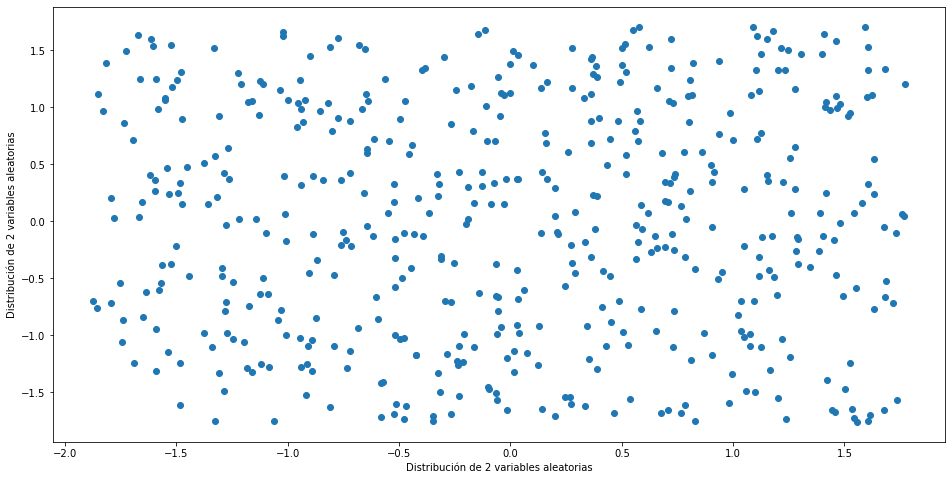

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['VEGETALES'], df['ABARROTES'])
ax.set_xlabel('Distribución de 2 variables aleatorias')
ax.set_ylabel('Distribución de 2 variables aleatorias')
plt.show()

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

VEGETALES     1.652224
LECHE         1.734832
ABARROTES     1.773287
CONGELADOS    1.714249
LIMPIEZA      1.748619
GOURMET       1.671466
dtype: float64


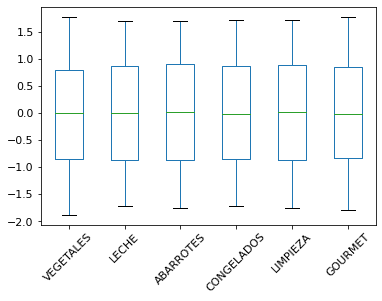

In [8]:
df.boxplot(column=['VEGETALES', 'LECHE',  'ABARROTES',  'CONGELADOS',  'LIMPIEZA',   'GOURMET'], grid=False, rot=45, fontsize=11)



> Nota:

Al parecer, no tengo outliers, hice un gráfico de dispersión y al revisar los boxplots me percaté de que no existen outliers. Por lo que omito la pregunta y se continúa. 





---



---



**Desafío Nro. 5**

Aplicar componentes principales a los datos resultantes luego de haber retirado outliers. Ojo: es sin reducir dimensiones aún.

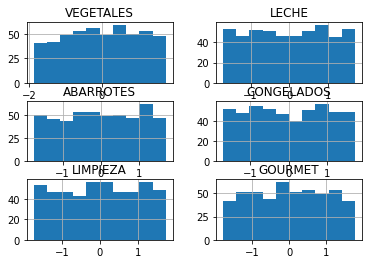

In [9]:
df.hist()
plt.show()

In [10]:
pca=PCA(n_components=None)
pca.fit(df_estandarizado)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
transformada=pca.transform(df_estandarizado)

In [12]:
print('Se continúa trabajando en datasets de 6 dimensiones, incluso después de aplicar PCA al ndarray "df_estandarizado"')
print('Dimensiones del primer ndarray después de estandarizar su contenido', df_estandarizado.shape)
print('Dimensiones del primer ndarray después de aplicar PCA a su contenido', transformada.shape)


Se continúa trabajando en datasets de 6 dimensiones, incluso después de aplicar PCA al ndarray "df_estandarizado"
Dimensiones del primer ndarray después de estandarizar su contenido (500, 6)
Dimensiones del primer ndarray después de aplicar PCA a su contenido (500, 6)


In [13]:
df2 = pd.DataFrame(transformada, columns=options)
df2

,VEGETALES,LECHE,ABARROTES,CONGELADOS,LIMPIEZA,GOURMET
0,-0.638772,-1.601311,0.024161,0.329152,1.562127,-0.513951
1,0.068506,0.411695,0.087827,1.350338,1.099285,0.986099
2,-0.437758,-0.488263,-0.824779,1.961056,0.874405,-0.206082
3,2.134042,-0.384689,-0.185327,0.404247,-0.273907,0.572302
4,0.817020,0.623640,0.057039,0.122308,0.260487,-0.043101
...,...,...,...,...,...,...
495,-0.053736,-1.517163,0.017361,0.476773,0.274677,0.066372
496,-0.219645,1.053337,-2.375819,-0.642781,-0.312227,-0.117488
497,-0.099850,0.198780,-1.361272,-0.525718,-0.993595,1.758448
498,1.606564,1.265965,-0.354470,0.608980,0.986140,-0.537235


**Desafío Nro. 6**

In [14]:
print(df_estandarizado)

[[-0.42482061  1.04895512 -1.17355768  1.19635331  1.27661793  0.25788453]
 [ 0.26603276 -0.12445867 -1.54290164  0.69467247 -1.10366843 -0.13662516]
 [-0.47097518  1.29824554 -1.61851262  0.32504919 -0.70269331  0.79800417]
 ...
 [-1.30688578 -0.15463413  0.92612789 -0.09422497 -1.3862771  -1.31836103]
 [ 1.57777502  0.11488757  0.16583683  0.85362427 -1.24935022  1.05909786]
 [ 0.62391385 -0.64738563  1.53206105 -0.89967271  0.56817019 -0.91416791]]


In [15]:
print(transformada)

[[-0.63877222 -1.60131058  0.02416069  0.32915234  1.5621267  -0.51395106]
 [ 0.06850598  0.41169473  0.08782672  1.35033792  1.09928473  0.98609866]
 [-0.43775762 -0.48826314 -0.82477895  1.96105604  0.87440496 -0.20608245]
 ...
 [-0.09985003  0.19877984 -1.36127212 -0.52571787 -0.99359467  1.75844775]
 [ 1.60656419  1.26596453 -0.35446999  0.60898048  0.98613971 -0.53723486]
 [-0.15674302  0.86950053  0.45590032 -1.76961797 -0.98944593 -0.1565993 ]]


In [16]:
expl = pca.explained_variance_ratio_
print(expl)
print('Suma de las varianzas de las primeras 5 columnas:',sum(expl[:5]))
print('Suma de las varianzas de las últimas 5 columnas:',sum(expl[1:]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

[0.19199751 0.17476018 0.16819263 0.16277351 0.1565234  0.14575276]
Suma de las varianzas de las primeras 5 columnas: 0.8542472398823473
Suma de las varianzas de las últimas 5 columnas: 0.8080024887692395


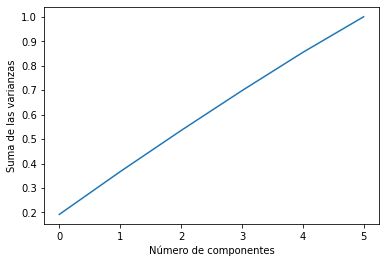

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Suma de las varianzas')
plt.show()


**Respuesta:** Como hasta este momento no hemos hecho reducción de dimensionalidad y utilizamos sklearn para que procesara un dataframe de 6 columnas pidiendole que utilizara PCA al mismo dataframe con sus 6 columnas vemos que podemos prescindir de la 6ta columna, porque el 87% del dataset se explica con las primero 5 columnas(sin reducir las dimensiones).
Como las varianzas de este array transformado está distribuida en las variables, las primeras 5 columnas tienen la mayor varianza que cada variable pueda explicar por si sola. 
En términos generales, los primeros 5 (k=5) componentes principales explican la mayor varianza que cualquier variable puede explicar, y las últimas variables explican la menor varianza que cualquier variable pueda explicar. 
Es por esta razón que se incluye también el print con las últimas 5 columnas. 






---



---



**Desafío Nro. 7**

Reducir a dos dimensiones y graficar en el plano, en conjunto con todas las componentes. Interpretar estas componentes conjuntas con las direcciones de las dimensiones originales.

In [18]:
pca2=PCA(n_components=2)
pca2.fit(df_estandarizado)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
transformada2=pca2.transform(df_estandarizado)

In [20]:
print(df_estandarizado.shape) #data original con 6 dimensiones 
print(transformada2.shape) #data transformada en 2 dimenciones

(500, 6)
(500, 2)


In [21]:
columnas = ['PCA1', 'PCA2']
dfpca = pd.DataFrame(transformada2, columns=columnas)
dfpca

,PCA1,PCA2
0,-0.638772,-1.601311
1,0.068506,0.411695
2,-0.437758,-0.488263
3,2.134042,-0.384689
4,0.817020,0.623640
...,...,...
495,-0.053736,-1.517163
496,-0.219645,1.053337
497,-0.099850,0.198780
498,1.606564,1.265965


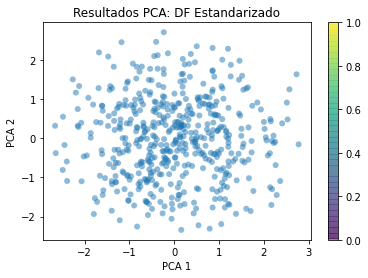

In [22]:
plt.scatter(transformada2[:, 0], transformada2[:, 1], c=None, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gnuplot2_r', 10))
plt.title('Resultados PCA: DF Estandarizado')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar();

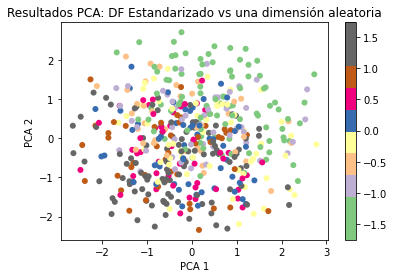

In [23]:
plt.scatter(transformada2[:, 0], transformada2[:, 1],
            c=df['LIMPIEZA'], edgecolor='none', alpha=200,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.title('Resultados PCA: DF Estandarizado vs una dimensión aleatoria')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar();

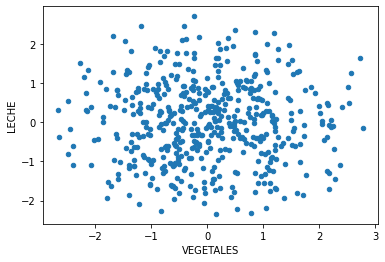

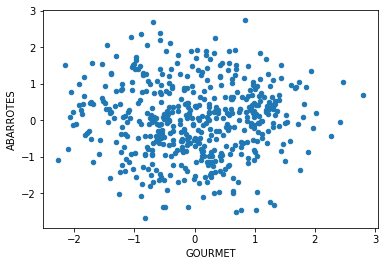

In [24]:
df2.plot.scatter('VEGETALES', 'LECHE', s=None, c=None)
df2.plot.scatter('GOURMET', 'ABARROTES', s=None, c=None)



> Comentarios:

A falta de una variable categórica que me permitiera graficar todo en un sólo gráfico, he decidido hacer gráficos diferentes que expresan lo mismo. 
En ellos podemos ver que nuestra reducción de dimensiones tuvo éxito y que casi no hubo pérdida de información, ya que la dispersión de los datos siguen estando representada en los valores de los 2 ejes del resultado del PCA. 





---



---



**Desafío Nro. 8**

Aplicar un método de clusterización a la data reducida, en donde el número de clusters debe ser óptimo de acuerdo al coeficiente de silhouette si usa k-means o alguna extensión de éste.

In [25]:
wcss = []
for i in range(1,30):
  kmeans_pca = KMeans(n_clusters= i, init='k-means++', random_state=42)
  kmeans_pca.fit(transformada2)
  wcss.append(kmeans_pca.inertia_)

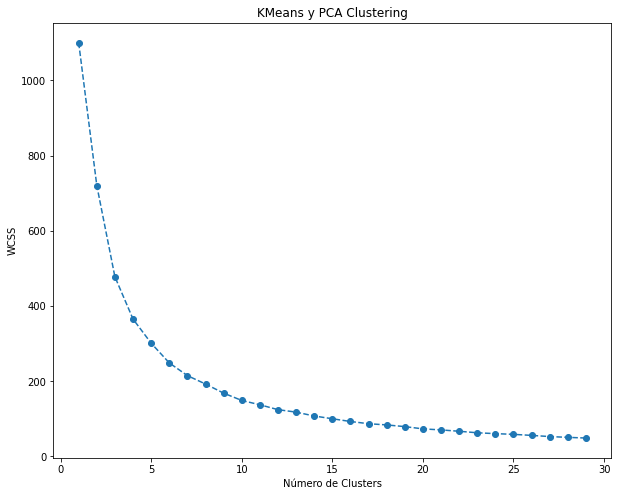

In [26]:
plt.figure(figsize=(10,8))
plt.plot(range(1,30), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('KMeans y PCA Clustering')
plt.show()

In [27]:
silhouette_score(transformada2, kmeans_pca.labels_)

0.3450594168110173

In [28]:
KMean= KMeans(n_clusters=4)
KMean.fit(transformada2)
label=KMean.predict(transformada2)
print(f'Silhouette Score(n=5): {silhouette_score(transformada2, label)}')

Silhouette Score(n=5): 0.3464564034464274


*El coeficiente de Silhouette y el método de Elbow me dicen que la cantidad de cluster óptima está entre 3 y 4, más inclinado a 4, por lo que graficaré con 4 clusters*

In [29]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(transformada2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [30]:
result = pd.concat([df, dfpca], axis=1, join='inner')

In [31]:
result['SEGMENTO KMEANS-PCA'] = kmeans_pca.labels_

In [32]:
result['CATEGORIAS']= result['SEGMENTO KMEANS-PCA'].map({0:'Clientes Frecuentes', 1:'Clientes Habituales', 2:'Clientes Ocasionales', 3:'Cliente TOP'})

In [33]:
result

,VEGETALES,LECHE,ABARROTES,CONGELADOS,LIMPIEZA,GOURMET,PCA1,PCA2,SEGMENTO KMEANS-PCA,CATEGORIAS
0,-0.424821,1.048955,-1.173558,1.196353,1.276618,0.257885,-0.638772,-1.601311,3,Cliente TOP
1,0.266033,-0.124459,-1.542902,0.694672,-1.103668,-0.136625,0.068506,0.411695,1,Clientes Habituales
2,-0.470975,1.298246,-1.618513,0.325049,-0.702693,0.798004,-0.437758,-0.488263,3,Cliente TOP
3,-0.455957,-1.089045,0.593021,1.064985,-1.000711,1.192155,2.134042,-0.384689,2,Clientes Ocasionales
4,0.693878,-0.303111,0.180820,0.322636,-0.551408,0.360816,0.817020,0.623640,1,Clientes Habituales
...,...,...,...,...,...,...,...,...,...,...
495,-1.087468,0.150207,-0.633828,0.636746,0.598637,0.491363,-0.053736,-1.517163,3,Cliente TOP
496,0.013282,1.653836,1.495824,-0.268348,-1.346355,-0.684994,-0.219645,1.053337,0,Clientes Frecuentes
497,-1.306886,-0.154634,0.926128,-0.094225,-1.386277,-1.318361,-0.099850,0.198780,1,Clientes Habituales
498,1.577775,0.114888,0.165837,0.853624,-1.249350,1.059098,1.606564,1.265965,1,Clientes Habituales


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


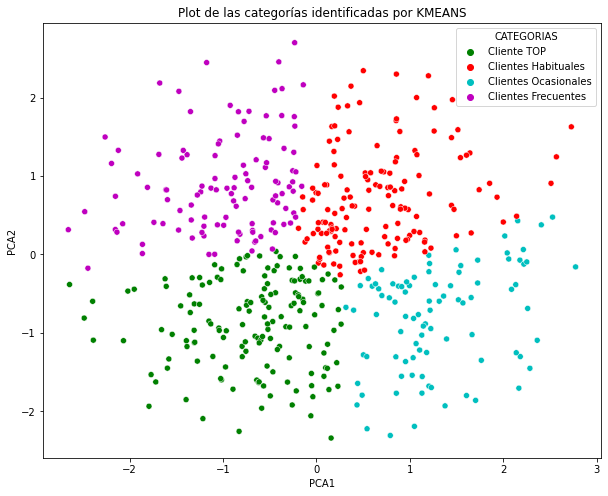

In [34]:
x_axis = result['PCA1']
y_axis = result['PCA2']
plt.figure(figsize= (10, 8))
sns.scatterplot(x_axis, y_axis, hue = result['CATEGORIAS'], palette = ['g', 'r', 'c', 'm'])
plt.title('Plot de las categorías identificadas por KMEANS')
plt.show()

**Desafío Nro. 10**

Aplicar componentes principales inverso para recuperar los datos originales.

In [35]:
pca3=PCA(n_components=2)
X2D = pca3.fit_transform(df_estandarizado)
X2D_inv = pca3.inverse_transform(X2D)

In [36]:
print(X2D.shape)
print(X2D_inv.shape)

(500, 2)
(500, 6)


In [37]:
#Se rearma el dataframe original de un principio. 
options = ['VEGETALES', 'LECHE', 'ABARROTES', 'CONGELADOS', 'LIMPIEZA', 'GOURMET']
result2 = pd.DataFrame(X2D_inv, columns=options)
print('Las dimensiones del Dataframe es igual a: ', df.shape)
result2.head()

Las dimensiones del Dataframe es igual a:  (500, 6)


,VEGETALES,LECHE,ABARROTES,CONGELADOS,LIMPIEZA,GOURMET
0,-1.260364,0.327321,-0.407421,0.253786,1.022530,0.024513
1,0.311839,-0.043090,0.066789,-0.111213,-0.233696,-0.060354
2,-0.415271,0.204044,-0.220585,-0.039298,0.385895,-0.129735
3,-0.011248,-0.902684,0.809229,1.159409,-0.452038,1.297589
4,0.563277,-0.371250,0.384010,0.174030,-0.571545,0.311330


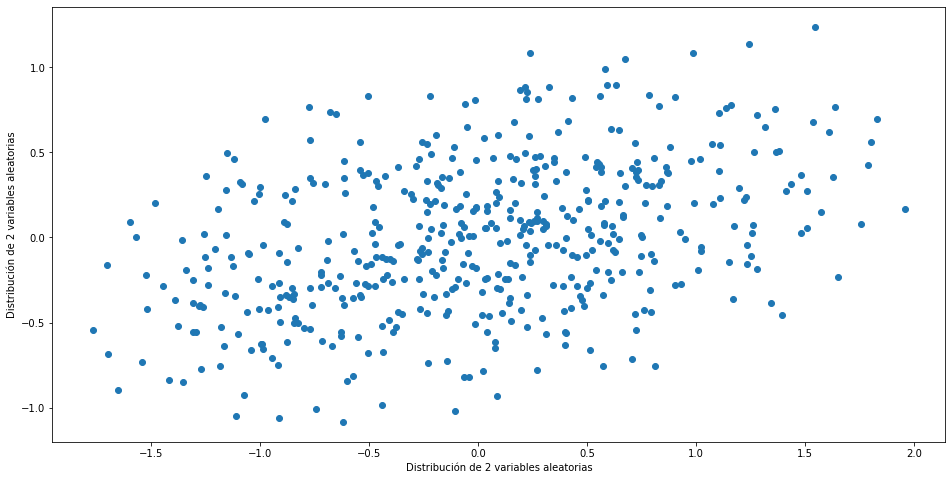

In [38]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(result2['VEGETALES'], result2['ABARROTES'])
ax.set_xlabel('Distribución de 2 variables aleatorias')
ax.set_ylabel('Distribución de 2 variables aleatorias')
plt.show()

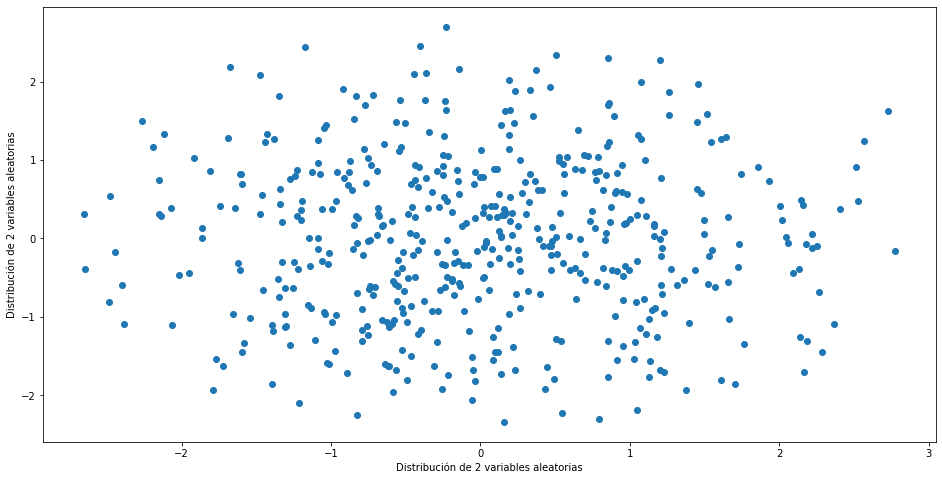

In [39]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(result['PCA1'], result['PCA2'])
ax.set_xlabel('Distribución de 2 variables aleatorias')
ax.set_ylabel('Distribución de 2 variables aleatorias')
plt.show()

**Conclusión:**

A pesar de que no son los mismos valores, podemos ver que se recuperaron las 6 dimensiones del dataset original, y además los valores quedaron ordenados en el eje ortogonal. 


In [40]:
print('NumPy covariance matrix: \n%s' %np.cov(df.T))

NumPy covariance matrix: 
[[ 1.00200401 -0.04122693  0.00965049 -0.01124446 -0.04791314 -0.02004329]
 [-0.04122693  1.00200401 -0.02576476 -0.02807597 -0.0091032  -0.06933914]
 [ 0.00965049 -0.02576476  1.00200401  0.04847188 -0.03751573  0.02371153]
 [-0.01124446 -0.02807597  0.04847188  1.00200401 -0.00632543  0.07325671]
 [-0.04791314 -0.0091032  -0.03751573 -0.00632543  1.00200401 -0.04663311]
 [-0.02004329 -0.06933914  0.02371153  0.07325671 -0.04663311  1.00200401]]


In [41]:
cov_mat = np.cov(df.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.12744677  0.37620565  0.73624368 -0.43432223 -0.3064746  -0.13270035]
 [ 0.42899175  0.46242812 -0.03328083 -0.30490681  0.70878631  0.07531603]
 [-0.39654916  0.18428143  0.09624399  0.39543021  0.3700131  -0.7115135 ]
 [-0.48019365 -0.25760714 -0.35003846 -0.72699367  0.14796881 -0.17352557]
 [ 0.30499881  0.43882616 -0.5168926  -0.10336896 -0.49288197 -0.44001317]
 [-0.56467862  0.59307677 -0.2405615   0.1510829  -0.04425138  0.49673326]]

Eigenvalues 
[1.15429365 0.8762691  1.05066243 0.94102245 1.01117814 0.97859828]
